<a href="https://colab.research.google.com/github/noyon57/Newcolab-file/blob/main/WithoutDuplicete(pregnancy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [399]:
dataset=pd.read_csv('Maternal Health Risk Data Set.csv')

In [400]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


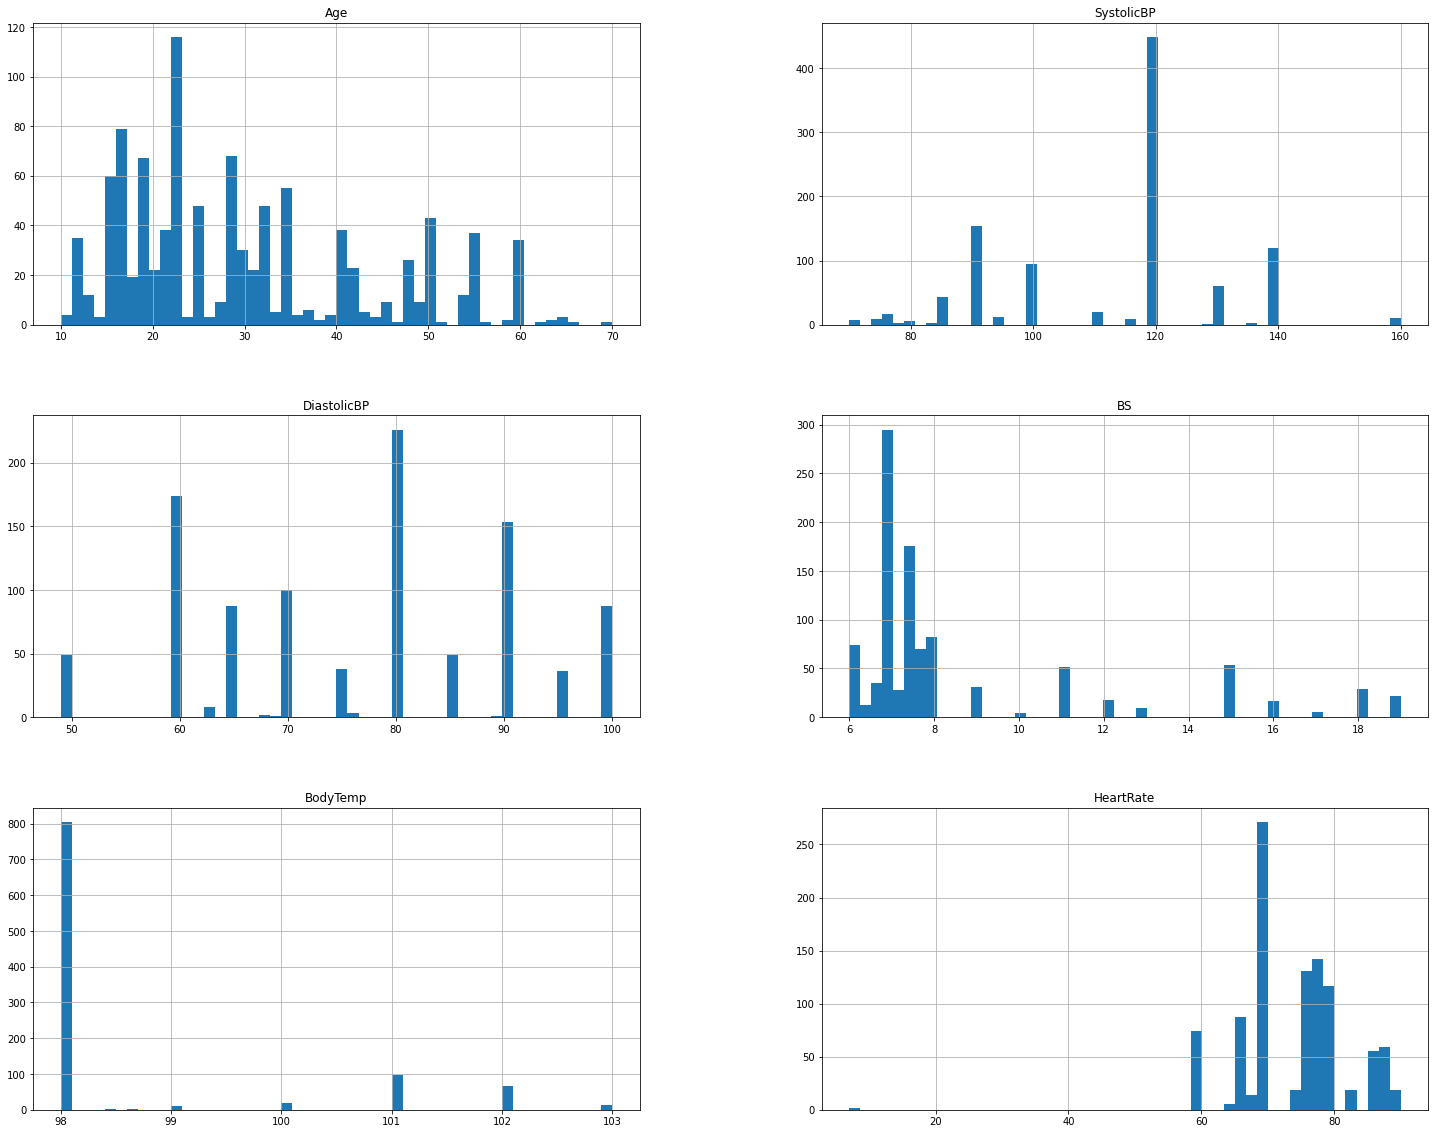

In [401]:
dataset.hist(bins=50, figsize=(25, 20))
plt.show()

Text(0, 0.5, '')

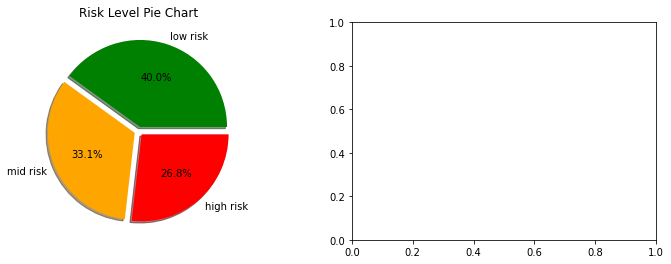

In [402]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

dataset["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')



In [403]:
dataset.RiskLevel = le.fit_transform(dataset.RiskLevel.values)


In [404]:
print(f"There are {dataset.duplicated().sum()} duplicates dataset")
dataset.loc[dataset.duplicated(keep=False)].sort_values(by=dataset.columns.to_list())

There are 562 duplicates dataset


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,2
849,10,100,50,6.0,99.0,70,2
552,12,90,60,7.5,102.0,60,1
940,12,90,60,7.5,102.0,60,1
543,12,90,60,7.5,102.0,66,1
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,2
772,60,120,85,15.0,98.0,60,2
818,60,120,85,15.0,98.0,60,2
114,63,140,90,15.0,98.0,90,0


In [405]:
#removing duplicate
dataset.drop_duplicates(keep='first', inplace=True)

In [406]:
print(f"There are {dataset.duplicated().sum()} duplicates dataset")
dataset.loc[dataset.duplicated(keep=False)].sort_values(by=dataset.columns.to_list())

There are 0 duplicates dataset


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [407]:
original_train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

# To be sure we will create a copy for further processing
train_dataset = original_train_dataset.copy()

In [408]:
correlation_matrix = train_dataset.corr(method='pearson')

correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.376148,0.339450,0.372321,-0.197558,0.101733,-0.148263
SystolicBP,0.376148,1.000000,0.810391,0.349334,-0.208394,-0.029292,-0.143013
DiastolicBP,0.339450,0.810391,1.000000,0.305721,-0.200234,-0.031005,-0.168854
BS,0.372321,0.349334,0.305721,1.000000,-0.028380,0.118854,-0.403081
BodyTemp,-0.197558,-0.208394,-0.200234,-0.028380,1.000000,0.097079,-0.092769
HeartRate,0.101733,-0.029292,-0.031005,0.118854,0.097079,1.000000,-0.114078
RiskLevel,-0.148263,-0.143013,-0.168854,-0.403081,-0.092769,-0.114078,1.000000


In [409]:
correlation_matrix["RiskLevel"].sort_values()


BS            -0.403081
DiastolicBP   -0.168854
Age           -0.148263
SystolicBP    -0.143013
HeartRate     -0.114078
BodyTemp      -0.092769
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

In [410]:
#handeling missing data
names = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate', 'BS']

for name in names:
    train_dataset[name].replace(0, np.nan, inplace=True)

In [411]:
train_dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
543,12,90,60,7.5,102.0,66,1
63,29,90,70,6.7,98.0,80,2
443,32,120,90,6.8,98.0,70,1
424,25,120,100,6.8,98.0,60,2
191,17,90,65,6.1,103.0,67,0
...,...,...,...,...,...,...,...
251,12,95,60,6.9,98.0,65,1
266,28,90,60,6.9,98.0,82,1
535,16,70,50,7.5,100.0,70,1
445,23,99,60,6.8,98.0,76,1


In [412]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_dataset = train_dataset.copy()
column_names = temp1_dataset.columns.tolist()

# transform all attributes
temp1_dataset[column_names] = mm_scaler.fit_transform(temp1_dataset[column_names])

temp1_dataset.sort_index(inplace=True)
temp1_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.267857,0.666667,0.607843,0.692308,0.0,0.951807,0.0
1,0.446429,0.777778,0.803922,0.538462,0.0,0.759036,0.0
2,0.339286,0.222222,0.411765,0.153846,0.4,0.879518,0.0
3,0.357143,0.777778,0.705882,0.076923,0.0,0.759036,0.0
4,0.446429,0.555556,0.215686,0.007692,0.0,0.831325,0.5


In [413]:

standard_scaler = StandardScaler()

temp2_dataset = train_dataset.copy()

# transform all attributes
temp2_dataset[column_names] = mm_scaler.fit_transform(temp2_dataset[column_names])
temp2_dataset.sort_index(inplace=True)
temp2_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.267857,0.666667,0.607843,0.692308,0.0,0.951807,0.0
1,0.446429,0.777778,0.803922,0.538462,0.0,0.759036,0.0
2,0.339286,0.222222,0.411765,0.153846,0.4,0.879518,0.0
3,0.357143,0.777778,0.705882,0.076923,0.0,0.759036,0.0
4,0.446429,0.555556,0.215686,0.007692,0.0,0.831325,0.5


Removing Irrelevant Features
After conducting several analyzes of the predictor variables, we conclude that the HeartRate variable is less helpful in determining the health risks of pregnant women. So, it's safe to remove that variable.

In [414]:
dataset_proc = dataset.drop(dataset.index[dataset.HeartRate == 7])


In [415]:
dataset_proc = dataset_proc.drop(["HeartRate"], axis=1)

In [416]:
# separating the data and labels
X = dataset.drop(columns = 'RiskLevel', axis=1)
y = dataset['RiskLevel']

In [417]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [418]:
print(X.shape, X_train.shape, X_test.shape)

(452, 6) (361, 6) (91, 6)


In [419]:
model1=RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model3 = DecisionTreeClassifier(max_depth = 2,random_state=0)
model4 = LogisticRegression()
model5 =SVC(kernel = 'rbf')
model6 = GaussianNB()
model7 = MLPClassifier(random_state=1, max_iter=300)
model8=AdaBoostClassifier(n_estimators=50, learning_rate=1,random_state=96)
model9 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)









In [420]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)
model9.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNeighborsClassifier()

In [421]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)


y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)
y_pred8 = model8.predict(X_test)
y_pred9 = model9.predict(X_test)


In [422]:
#Confusion matrix
cm_randomForest = confusion_matrix(y_test, y_pred1)
cm_XGB = confusion_matrix(y_test, y_pred2)
cm_DT = confusion_matrix(y_test, y_pred3)
cm_Logistic = confusion_matrix(y_test, y_pred4)
cm_svc = confusion_matrix(y_test, y_pred5)


cm_gaussian = confusion_matrix(y_test, y_pred6)
cm_mlp = confusion_matrix(y_test, y_pred7)
cm_adaboost = confusion_matrix(y_test, y_pred8)
cm_KNN = confusion_matrix(y_test, y_pred9)


In [423]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics


For rf

[[13 10  0]
 [ 1 46  0]
 [ 2 19  0]]
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        23
           1       0.61      0.98      0.75        47
           2       0.00      0.00      0.00        21

    accuracy                           0.65        91
   macro avg       0.48      0.51      0.47        91
weighted avg       0.52      0.65      0.56        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


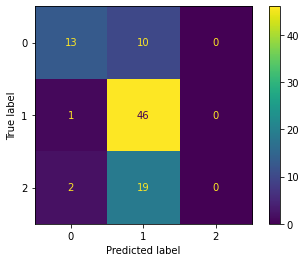

In [424]:



print(cm_randomForest)

cm_display = ConfusionMatrixDisplay(cm_randomForest).plot()

print(metrics.classification_report(y_test, y_pred1))

[[11  6  6]
 [ 1 46  0]
 [ 1 13  7]]
              precision    recall  f1-score   support

           0       0.85      0.48      0.61        23
           1       0.71      0.98      0.82        47
           2       0.54      0.33      0.41        21

    accuracy                           0.70        91
   macro avg       0.70      0.60      0.61        91
weighted avg       0.70      0.70      0.67        91



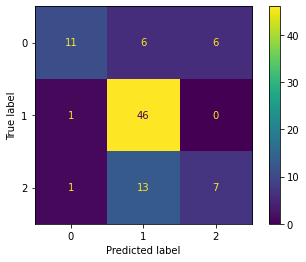

In [425]:
print(cm_XGB)

cm_display = ConfusionMatrixDisplay(cm_XGB).plot()

print(metrics.classification_report(y_test, y_pred2))

[[12  7  4]
 [ 1 46  0]
 [ 2 19  0]]
              precision    recall  f1-score   support

           0       0.80      0.52      0.63        23
           1       0.64      0.98      0.77        47
           2       0.00      0.00      0.00        21

    accuracy                           0.64        91
   macro avg       0.48      0.50      0.47        91
weighted avg       0.53      0.64      0.56        91



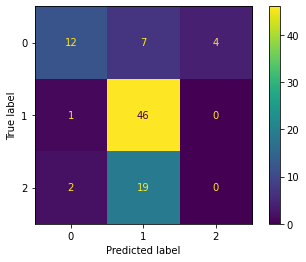

In [426]:
print(cm_DT)

cm_display = ConfusionMatrixDisplay(cm_DT).plot()

print(metrics.classification_report(y_test, y_pred3))

In [427]:
#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)

result4 = model_selection.cross_val_score(model4, X_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, X_train, y_train, cv=kfold)
result6 = model_selection.cross_val_score(model6, X_train, y_train, cv=kfold)
result7 = model_selection.cross_val_score(model7, X_train, y_train, cv=kfold)
result8 = model_selection.cross_val_score(model8, X_train, y_train, cv=kfold)
result9 = model_selection.cross_val_score(model9, X_train, y_train, cv=kfold)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [428]:
print('Accuracy of rf = ',result1.mean())
print('Accuracy of xgbboost = ',result2.mean())
print('Accuracy of dt = ',result3.mean())

print('Accuracy of Logistic Regression Model = ',result4.mean())
print('Accuracy of Support Vector Machine = ',result5.mean())
print('Accuracy of Gaussian Model = ',result6.mean())
print('Accuracy of MLP model = ',result7.mean())
print('Accuracy of Adaboost Model = ',result8.mean())
print('Accuracy of k-NN Model = ',result9.mean())


Accuracy of rf =  0.7146396396396396
Accuracy of xgbboost =  0.6924174174174175
Accuracy of dt =  0.7063063063063062
Accuracy of Logistic Regression Model =  0.6649399399399398
Accuracy of Support Vector Machine =  0.6232732732732733
Accuracy of Gaussian Model =  0.6511261261261263
Accuracy of MLP model =  0.6647897897897896
Accuracy of Adaboost Model =  0.6204954954954955
Accuracy of k-NN Model =  0.615015015015015


MAKING A HRBRID ALGORITHM USING  RF+XGB+DT

In [429]:
#Hybrid Ensemble Learning Model
estimators = []


In [430]:
#Defining 5 Decision Tree Classifiers
model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 5)
estimators.append(('cart3', model18))
model19 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart4', model19))
model20 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart5', model20))


In [431]:
#Defining 5 randomforest Tree Classifiers
model16 = RandomForestClassifier(max_depth=3, random_state=0,n_estimators=100)
estimators.append(('RandomForest1', model16))
model17 = RandomForestClassifier(max_depth=2, random_state=1,n_estimators=50)
estimators.append(('RandomForest2', model17))
model18 = RandomForestClassifier(max_depth=2, random_state=2,n_estimators=30)
estimators.append(('RandomForest3', model18))
model19 =RandomForestClassifier(max_depth=3, random_state=100,n_estimators=10)
estimators.append(('RandomForest4', model19))
model20 = RandomForestClassifier(max_depth=1, random_state=96,n_estimators=20)
estimators.append(('RandomForest5', model20))


In [432]:
#Defining 5 randomforest Tree Classifiers
model16 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
estimators.append(('XGB1', model16))
model17 = XGBClassifier(use_label_encoder=False)
estimators.append(('XGB2', model17))
model18 = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')
estimators.append(('XGB3', model18))
model19 =XGBClassifier( eval_metric='mlogloss')
estimators.append(('XGB4', model19))
model20 = XGBClassifier()
estimators.append(('XGB5', model20))

In [437]:
# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [438]:
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

[[14  6  3]
 [ 1 46  0]
 [ 2 13  6]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        23
           1       0.71      0.98      0.82        47
           2       0.67      0.29      0.40        21

    accuracy                           0.73        91
   macro avg       0.73      0.62      0.64        91
weighted avg       0.73      0.73      0.69        91



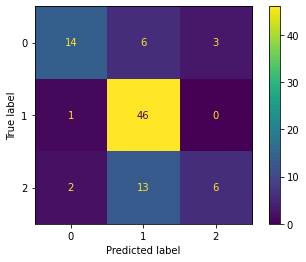

In [439]:
print(cm_HybridEnsembler)


cm_display = ConfusionMatrixDisplay(cm_HybridEnsembler).plot()

print(metrics.classification_report(y_test,y_pred))

In [440]:
#Cross-Validation
kfold = model_selection.KFold(n_splits=4)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

0.7286019536019537
